In [113]:
import os

In [114]:
os.getcwd()

'C:\\Users\\DELL\\OneDrive\\Desktop\\EDA'

In [115]:
os.chdir('C:\\Users\\DELL\\OneDrive\\Desktop\\EDA')

### Imported Some Libraries:

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
print(dir(pd))

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [118]:
train = pd.read_csv('titanic_train.csv')

### THE DATA : Titanic_Story

In [119]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [122]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

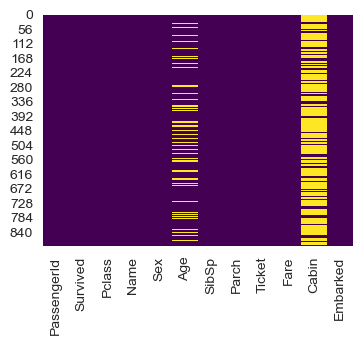

<Figure size 200x300 with 0 Axes>

In [123]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')
plt.show()
plt.figure (figsize=(2,3))

# 1. Missing Values Heatmap
The heatmap shows patterns of missing values.
Some columns (like Age and Cabin) have a significant number of missing entries, which need attention before modeling.  

C:\Users\DELL\AppData\Local\Temp\ipykernel_30080\7671277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='rainbow')


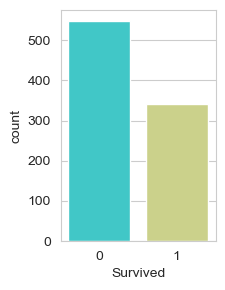

<Figure size 400x300 with 0 Axes>

In [124]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='rainbow')
plt.show()
plt.figure (figsize=(4,3))

# 2. Survival Count Plot
The dataset is imbalanced: it shows count of survived and not survived people. 

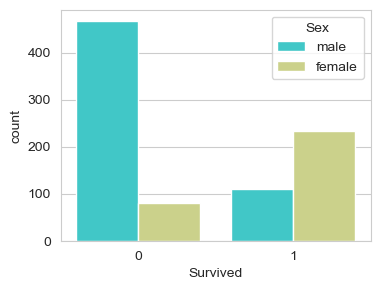

<Figure size 500x400 with 0 Axes>

In [125]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')
plt.show()
plt.figure (figsize=(5,4))

### 3. Survival by Sex
Females had a much higher survival rate than males,
indicating gender strongly influenced survival probability.  

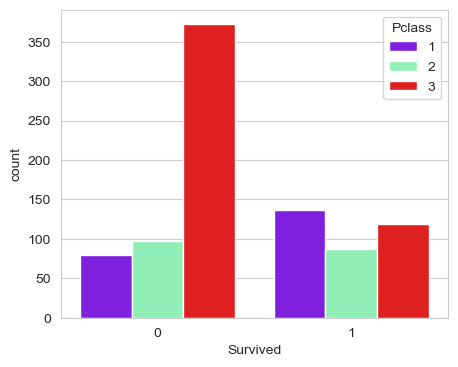

<Figure size 400x300 with 0 Axes>

In [126]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.show()
plt.figure (figsize=(4,3))

### 4. Survival by Passenger Class
Higher-class passengers (1st class) were more likely to survive,
while 3rd-class passengers faced the lowest survival chances.  

C:\Users\DELL\AppData\Local\Temp\ipykernel_30080\3452275775.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='blue',bins=50)


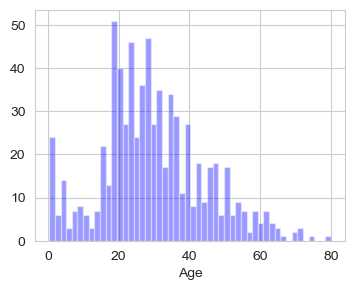

<Figure size 400x300 with 0 Axes>

In [127]:
sns.distplot(train['Age'].dropna(),kde=False,color='blue',bins=50)
plt.show()
plt.figure (figsize=(4,3))

### 5. Age Distribution
The distribution of age is slightly right-skewed,
with most passengers between 20–40 years old.
Some younger children and elderly passengers are present, but in smaller numbers. 

C:\Users\DELL\AppData\Local\Temp\ipykernel_30080\143978404.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=train,palette='rainbow')


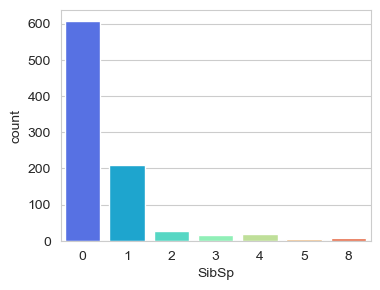

<Figure size 400x300 with 0 Axes>

In [128]:
sns.countplot(x='SibSp',data=train,palette='rainbow')
plt.show()
plt.figure (figsize=(4,3))

### 6. Siblings/Spouses (SibSp) Distribution
The majority of passengers traveled alone (SibSp = 0).
A smaller number had 1–2 family members,
with very few having larger family groups.  

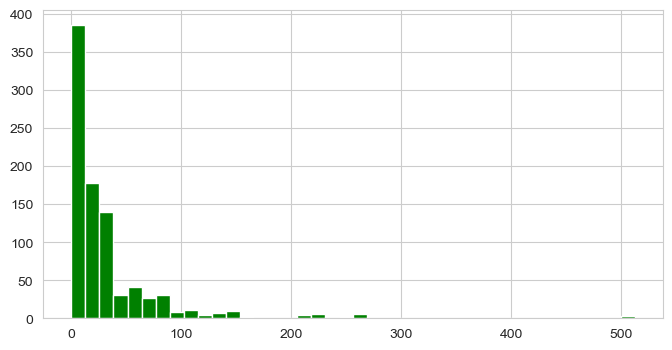

In [129]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

### 7. Fare Distribution
Most passengers paid relatively low fares, with a small group paying much higher fares.
This reflects strong class-based differences in ticket pricing.  

C:\Users\DELL\AppData\Local\Temp\ipykernel_30080\392527481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data= train,palette='winter')


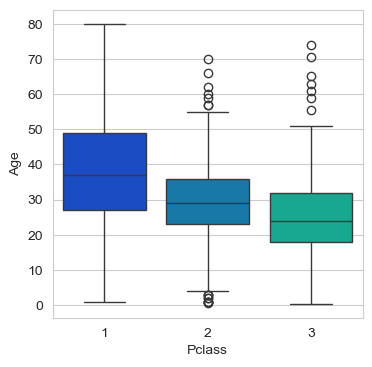

In [130]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Pclass',y='Age',data= train,palette='winter')
plt.show()

## 8. Boxplot: Age vs Passenger Class
The boxplot also reveals several *outliers in age*, especially in 2nd and 3rd class,
indicating some passengers’ ages were unusually high or low compared to the majority.

In [131]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [132]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_30080\3118387306.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_30080\3118387306.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


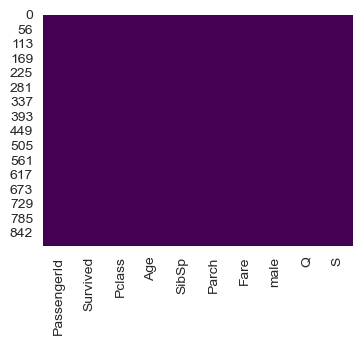

<Figure size 200x300 with 0 Axes>

In [144]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')
plt.show()
plt.figure (figsize=(2,3))

### 9. Outliers treated.

In [134]:
train.drop('Cabin',axis=1,inplace=True)

In [135]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [136]:
train.dropna(inplace= True)

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [138]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [139]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [140]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [141]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [142]:
train = pd.concat([train,sex,embark],axis=1)

In [143]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### 10. Concatenating Encoded Features
The processed Sex and Embarked dummy variables are added back into the dataset,
ensuring all features are numeric and machine-learning ready.